In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
class NaiveBayesClassifier:
    def fit(self, X, y):
        self.classes = y.unique()
        self.features = X.columns
        n_samples = len(y)
        self.class_priors = {c: sum(y == c) / n_samples for c in self.classes}
        
        self.feature_probs = {}
        for c in self.classes:
            self.feature_probs[c] = {}
            class_data = X[y == c]
            for feature in self.features:
                self.feature_probs[c][feature] = {}
                feature_counts = class_data[feature].value_counts()
                for value, count in feature_counts.items():
                    self.feature_probs[c][feature][value] = count / len(class_data)

    def predict(self, X):
        predictions = []
        for _, row in X.iterrows():
            probs = {}
            for c in self.classes:
                prob = np.log(self.class_priors[c])
                for feature in self.features:
                    value = row[feature]
                    if value in self.feature_probs[c][feature]:
                        prob += np.log(self.feature_probs[c][feature][value])
                    else:
                        prob += np.log(1 / (len(X) + len(self.feature_probs[c][feature])))
                probs[c] = prob
            predictions.append(max(probs, key=probs.get))
        return predictions

In [16]:
data = {
    'Days': ['Weekday', 'Weekday', 'Weekday', 'Holiday', 'Saturday', 'Weekday', 'Holiday', 'Sunday', 'Weekday', 'Weekday'],
    'Season': ['Spring', 'Winter', 'Winter', 'Winter', 'Summer', 'Autumn', 'Summer', 'Summer', 'Winter', 'Summer'],
    'Fog': ['None', 'None', 'None', 'High', 'Normal', 'Normal', 'High', 'Normal', 'High', 'None'],
    'Rain': ['None', 'Slight', 'None', 'Slight', 'None', 'None', 'Slight', 'None', 'Heavy', 'Slight'],
    'Class': ['On Time', 'On Time', 'On Time', 'Late', 'On Time', 'Very Late', 'On Time', 'On Time', 'Very Late', 'On Time']
}
df = pd.DataFrame(data)

In [17]:
X = df.drop('Class', axis=1)
y = df['Class']

clf = NaiveBayesClassifier()
clf.fit(X, y)

In [18]:
test_example = pd.DataFrame({
    'Days': ['Weekday'],
    'Season': ['Winter'],
    'Fog': ['High'],
    'Rain': ['Slight']
})

prediction = clf.predict(test_example)[0]
print(f"Prediction: {prediction}")

Prediction: Late


In [19]:
print("\nClass Priors:")
for c, prob in clf.class_priors.items():
    print(f"P({c}) = {prob:.4f}")

for c in clf.classes:
    print(f"\nFor class: {c}")
    for feature in clf.features:
        print(f"  {feature}:")
        for value, prob in clf.feature_probs[c][feature].items():
            print(f"    P({value}|{c}) = {prob:.4f}")


Class Priors:
P(On Time) = 0.7000
P(Late) = 0.1000
P(Very Late) = 0.2000

For class: On Time
  Days:
    P(Weekday|On Time) = 0.5714
    P(Saturday|On Time) = 0.1429
    P(Holiday|On Time) = 0.1429
    P(Sunday|On Time) = 0.1429
  Season:
    P(Summer|On Time) = 0.5714
    P(Winter|On Time) = 0.2857
    P(Spring|On Time) = 0.1429
  Fog:
    P(None|On Time) = 0.5714
    P(Normal|On Time) = 0.2857
    P(High|On Time) = 0.1429
  Rain:
    P(None|On Time) = 0.5714
    P(Slight|On Time) = 0.4286

For class: Late
  Days:
    P(Holiday|Late) = 1.0000
  Season:
    P(Winter|Late) = 1.0000
  Fog:
    P(High|Late) = 1.0000
  Rain:
    P(Slight|Late) = 1.0000

For class: Very Late
  Days:
    P(Weekday|Very Late) = 1.0000
  Season:
    P(Autumn|Very Late) = 0.5000
    P(Winter|Very Late) = 0.5000
  Fog:
    P(Normal|Very Late) = 0.5000
    P(High|Very Late) = 0.5000
  Rain:
    P(None|Very Late) = 0.5000
    P(Heavy|Very Late) = 0.5000


C:\Users\HP\AppData\Local\Temp\ipykernel_6784\2525469504.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(class_priors.keys()), y=list(class_priors.values()), palette='viridis')


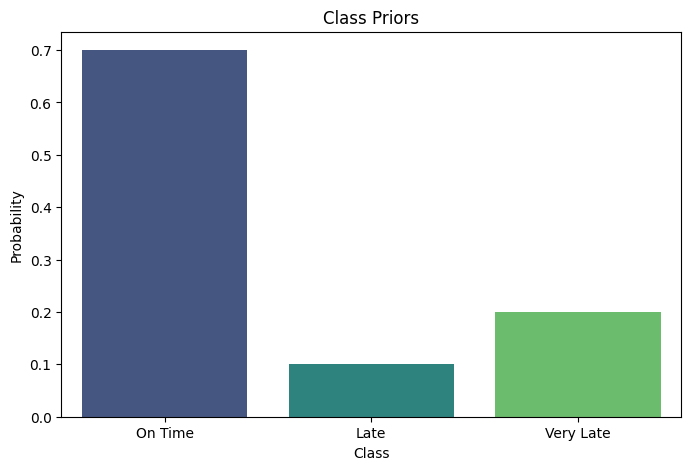

In [20]:
def plot_class_priors(class_priors):
    plt.figure(figsize=(8, 5))
    sns.barplot(x=list(class_priors.keys()), y=list(class_priors.values()), palette='viridis')
    plt.title('Class Priors')
    plt.xlabel('Class')
    plt.ylabel('Probability')
    plt.show()

plot_class_priors(clf.class_priors)

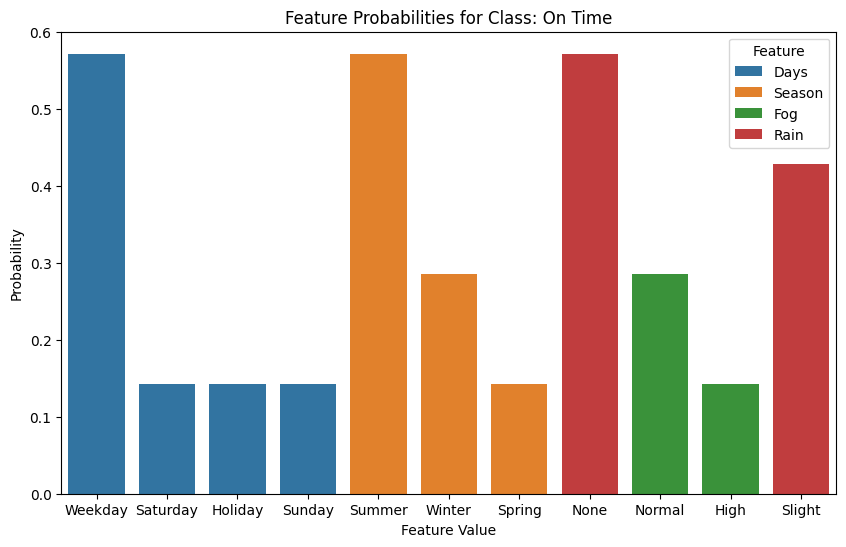

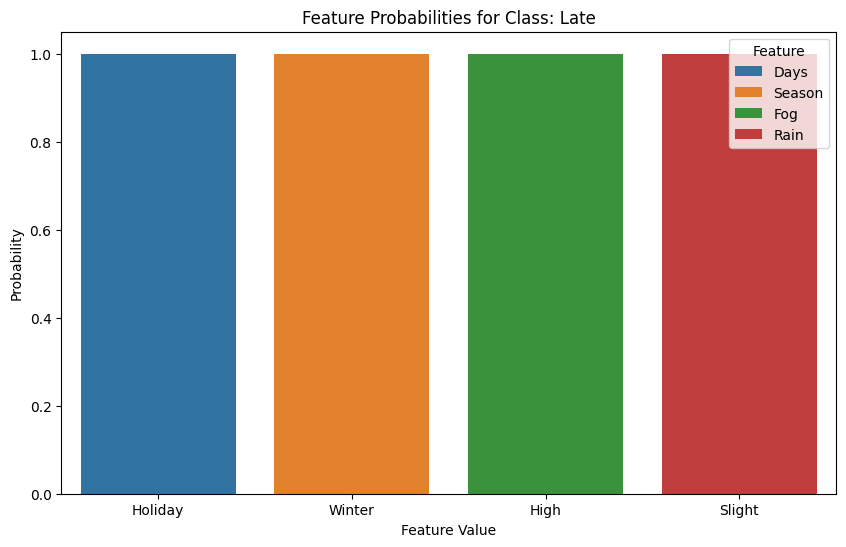

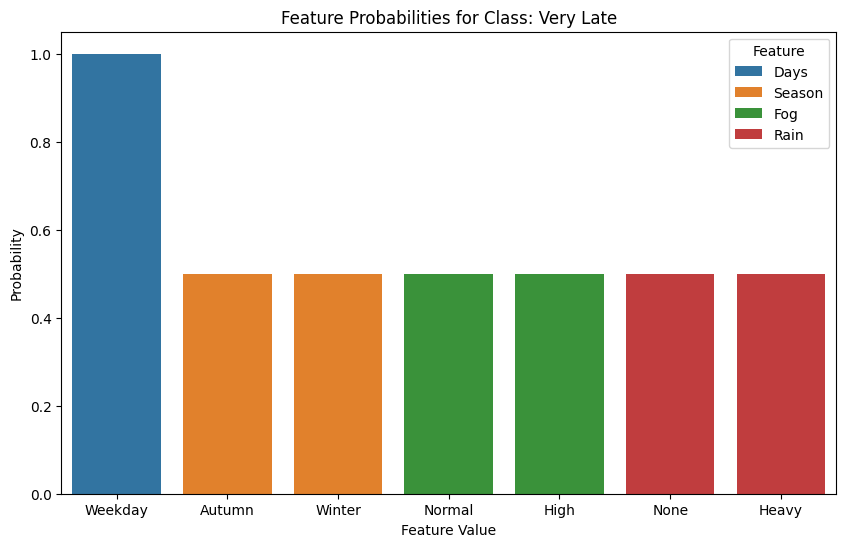

In [21]:
def plot_feature_probabilities(feature_probs):
    for c in feature_probs:
        plt.figure(figsize=(10, 6))
        for feature in feature_probs[c]:
            values = list(feature_probs[c][feature].keys())
            probs = list(feature_probs[c][feature].values())
            sns.barplot(x=values, y=probs, label=feature)
        plt.title(f'Feature Probabilities for Class: {c}')
        plt.xlabel('Feature Value')
        plt.ylabel('Probability')
        plt.legend(title="Feature")
        plt.show()

plot_feature_probabilities(clf.feature_probs)